# Visu 2: Computing width: width with pixel variance

In this notebook, we use a movie to compute the width of the hypha by computing the variance on each pixel over time along the section of the hypha.

Carefull: the profile_line function doesn't have the same coordinate order as matplot lib.
(x, y) in matplot lib becomes (y, x) in profile_line

## Setup

In [1]:
from amftrack.util.sys import storage_path
from amftrack.util.video_analysis import (
    extract_kymograph,
    variance_over_time_on_segment,
)
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

from skimage.measure import profile_line

%matplotlib notebook

/home/felix/Wks/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Defining the region

In [2]:
image_path = os.path.join(
    storage_path,
    "width2/20220324_Plate907_029/Img/Basler_acA4112-30um__40044625__20220324_112622932_0004.tiff",
)

In [3]:
image_path

'/media/felix/AMFtopology02/storage/width2/20220324_Plate907_029/Img/Basler_acA4112-30um__40044625__20220324_112622932_0004.tiff'

In [4]:
im = image.imread(image_path)
print(im.shape)

(3000, 4096)


In [5]:
x1, y1 = 1900, 2575
x2, y2 = 2700, 2360

In [6]:
np.linalg.norm(np.array([x1, y1]) - np.array([x2, y2]))

828.3869868606097

<IPython.core.display.Javascript object>


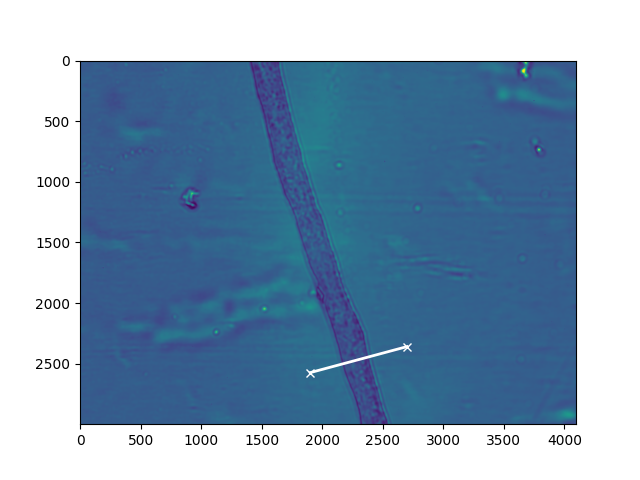

In [8]:
plt.imshow(im)
plt.plot(x1, y1, marker="x", color="white")
plt.plot(x2, y2, marker="x", color="white")

plt.plot([x1, x2], [y1, y2], color="white", linewidth=2)

### Extract profile

<IPython.core.display.Javascript object>


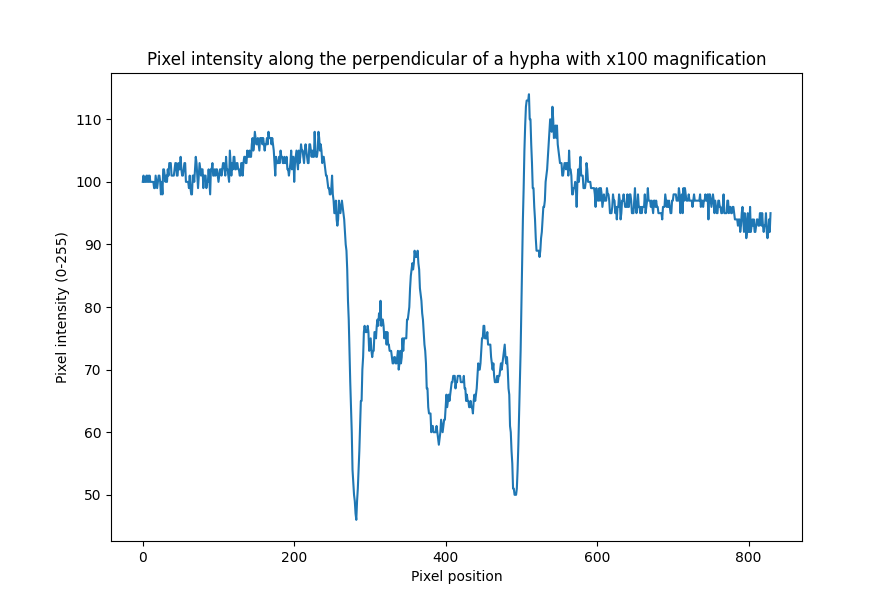

Text(0.5, 1.0, 'Pixel intensity along the perpendicular of a hypha with x100 magnification')

In [11]:
profile = profile_line(
    im, src=[y1, x1], dst=[y2, x2], linewidth=1
)  # careful with (y, x) and not (x, y)
plt.plot(list(range(len(profile))), profile)
plt.xlabel("Pixel position")
plt.ylabel("Pixel intensity (0-255)")
plt.title("Pixel intensity along the perpendicular of a hypha with x100 magnification")

In [12]:
profile.shape

(830,)

## Debug

<IPython.core.display.Javascript object>


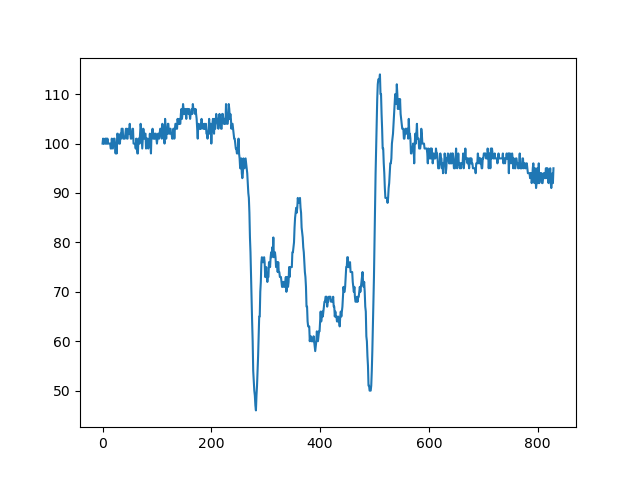

In [12]:
plt.plot(list(range(len(profile))), profile)
plt.show()

## Extraction

In [18]:
import re

pattern = r"Basler_acA4112-30um__40044625__20220324_112738811_00"
model = re.compile(pattern)


def is_valid(name):
    match = model.search(name)
    if match:
        return True
        return False

In [22]:
kymo = extract_kymograph(
    os.path.join(storage_path, "width2/20220324_Plate907_030/Img"),
    y1,
    x1,
    y2,
    x2,
    validation_fun=is_valid,
)

2022-06-22 12:00:07,616-[INFO]- root:41 -> Number of images handled: 99


<IPython.core.display.Javascript object>


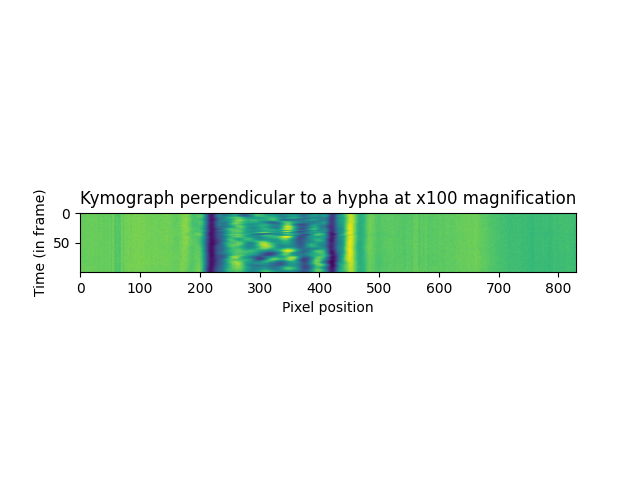

Text(0.5, 1.0, 'Kymograph perpendicular to a hypha at x100 magnification')

In [26]:
plt.imshow(kymo)
plt.xlabel("Pixel position")
plt.ylabel("Time (in frame)")
plt.title("Kymograph perpendicular to a hypha at x100 magnification")

In [30]:
variance_on_segment = variance_over_time_on_segment(
    os.path.join(storage_path, "width2/20220324_Plate907_030/Img"),
    y1,
    x1,
    y2,
    x2,
    validation_fun=is_valid,
)

2022-06-22 12:03:35,600-[INFO]- root:41 -> Number of images handled: 99


In [28]:
kymo.shape

(99, 830)

### Analyse

<IPython.core.display.Javascript object>


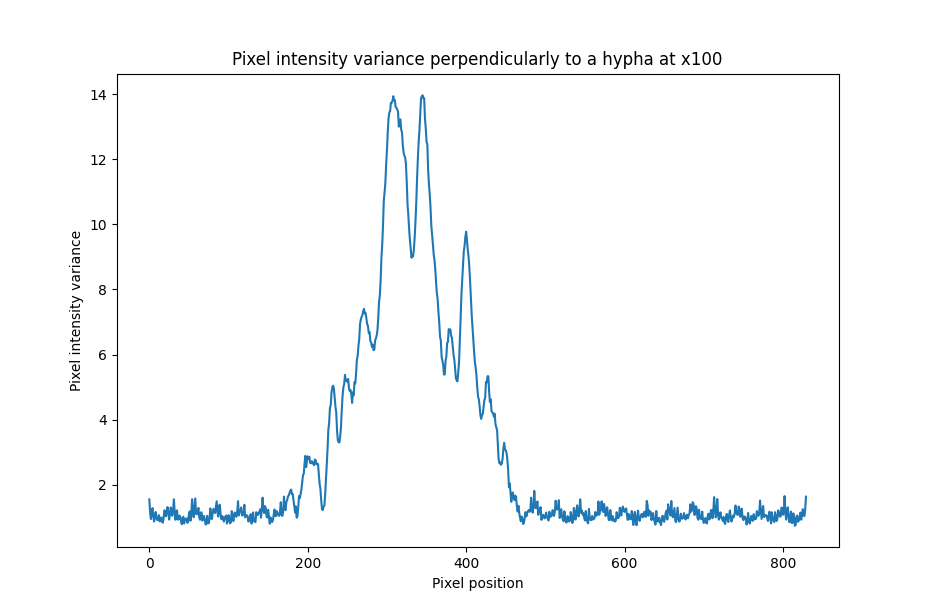

Text(0.5, 1.0, 'Pixel intensity variance perpendicularly to a hypha at x100')

In [33]:
plt.plot(variance_on_segment)
plt.xlabel("Pixel position")
plt.ylabel("Pixel intensity variance")
plt.title("Pixel intensity variance perpendicularly to a hypha at x100")